## Approximation des modes propres de l'équation de Schrödinger unidimensionnel

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Modes propres du Laplacien

#### 1.

Soit le problème suivant : 
$$
\left\{
    \begin{eqnarray}
        -u''(x)&=&Eu(x)&&\\
        u(-R)&=&u(R)&=&0
    \end{eqnarray}
\right.
$$

On cherche une solution de la forme :
$$
\begin{eqnarray}
    u(x)=a\cos(\omega x) + b\sin(\omega x)
\end{eqnarray}
$$

On y intègre les conditions aux limites :
$$
\left\{
    \begin{eqnarray}
        u(-R)&=&a\cos(-\omega R) + b\sin(-\omega R)&=&0\\
        u(R)&=&a\cos(\omega R) + b\sin(\omega R)&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a\cos(\omega R) - b\sin(\omega R)&=&0\\
        a\cos(\omega R) + b\sin(\omega R)&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a\cos(\omega R) &=&0\\
        b\sin(\omega R) &=&0
    \end{eqnarray}
\right.
$$

On peut donc différencier les cas : 
* $a=0$
    * $b=0$      
        $$u(x)=0$$
        
    * $b\neq 0$
        $$
            b\neq 0 \Rightarrow \sin(\omega R)=0 \Rightarrow \omega R = k\pi, k\in \mathbb{N} \Rightarrow u(x)=b\sin\left(\frac{k\pi}{R}x\right)=b\sin\left(\frac{k'\pi}{2R}x\right), k\in \mathbb{N}, k'\in \mathbb{N} \text{ pair}
        $$
        
* $a\neq 0$
    $$
        a\neq 0 \Rightarrow \cos(\omega R)=0 \Rightarrow \sin(\omega R)\neq 0 \Rightarrow b=0\\
        \cos(\omega R)=0 \Rightarrow \omega R = \frac{\pi}{2}+k\pi, k\in \mathbb{N} \Rightarrow u(x)=a\cos\left(\frac{(2k+1)k\pi}{2R}x\right)=a\cos\left(\frac{k'\pi}{2R}x\right), k\in \mathbb{N}, k'\in \mathbb{N} \text{ impair}
    $$

Déterminons $a$ et $b$ :


On peut maintenant en déduire $u_{k'}$ pour tout $k'\in \mathbb{N}$. On a :
$$
\left\{
    \begin{eqnarray}
        u_{k'}(x)&=&a\cos\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ impair}\\
        u_{k'}(x)&=&b\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ pair}
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        u_{k'}(x)&=&a\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ impair}\\
        u_{k'}(x)&=&b\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ pair}
    \end{eqnarray}
\right.\\
$$


#### 2.

TODO

#### 3.

TODO

#### 4.

TODO

In [3]:
N = 10
R = 1
h = 2*R/(N+1)

x = np.linspace(-R+h,R-h,N)

A = 1/h**2 * (np.diag(np.repeat(2,N)) - np.diag(np.repeat(1,N-1),k=-1) - np.diag(np.repeat(1,N-1),k=1))

lbd, vec = np.linalg.eig(A)
lbd = np.sort(lbd)
vec = vec[:,np.argsort(lbd)]

k = 2
vk = vec[:,k-1]
uk = 1/np.sqrt(R)*np.sin(k*np.pi*(x+R)/2/R)

uk/np.linalg.norm(uk)

array([ 0.23053002,  0.38786839,  0.42206128,  0.3222527 ,  0.12013117,
       -0.12013117, -0.3222527 , -0.42206128, -0.38786839, -0.23053002])

In [4]:
vk

array([ 0.23053002, -0.38786839,  0.42206128, -0.3222527 ,  0.12013117,
        0.12013117, -0.3222527 ,  0.42206128, -0.38786839,  0.23053002])

In [5]:
print(vk-uk/np.linalg.norm(uk))

[-3.58046925e-15 -7.75736772e-01 -1.77635684e-15 -6.44505403e-01
  2.49800181e-16  2.40262332e-01 -1.49880108e-15  8.44122562e-01
 -2.44249065e-15  4.61060038e-01]


#### 5.

In [6]:
k_vec = np.linspace(1,N,N)
E = k_vec**2*np.pi**2/4/R**2

erreur_approx = np.abs(E-lbd)
print(erreur_approx)

[1.67260039e-02 2.65443137e-01 1.32568431e+00 4.11102589e+00
 9.79507522e+00 1.97163919e+01 3.52700456e+01 5.77945960e+01
 8.84636504e+01 1.28190785e+02]


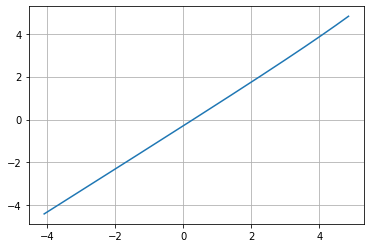

In [7]:
alpha = 4
C = 180

plt.plot(np.log(E-lbd),alpha*np.log(k_vec/(N+1))+np.log(C))
plt.grid()

TODO

### Modes propres de l'opérateur de Schödinger

In [8]:
def V(x,V0=1.,a=R/2):
    if (a < 0) or (a > R) or (V0 < 0):
        raise ValueError
        
    return (np.abs(x) > a) * V0
V(0.6,a=100)

ValueError: 